## Credit Score Classification

In this notebook we are going to classify the credit score of an individual with the data that we have with us. Data contains the person details such as annual income, credit utilization ratio etc., There are three classes**(Good, Standard, Poor)** to predict.

Dataset Link: https://www.kaggle.com/datasets/parisrohan/credit-score-classification

## Imports

In [44]:
import warnings
import pandas as pd
from pandas.api.types import is_numeric_dtype
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder as le
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import RobustScaler as rbScaler 
from sklearn.linear_model import LogisticRegression as lgrClassifier
from sklearn import metrics

from statsmodels.stats.outliers_influence import variance_inflation_factor

warnings.filterwarnings('ignore')
%matplotlib inline

## Credit Score Classification

In [86]:
df = pd.read_csv('train.csv', low_memory=False)
df.shape

(100000, 28)

In [87]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


Our target column is **Credit_Score**

## Answer the following

### 1.) What are the data types? (Only numeric and categorical)

In [88]:
df.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

Some of the columns are loaded as a objects by the pandas automatically, But we have to transform them to proper data types after the data analysis. I have listed them below after segregating them.

#### Numerical Columns:
1. Monthly_Inhand_Salary       
2. Num_Bank_Accounts
3. Num_Credit_Card              
4. Interest_Rate          
5. Delay_from_due_date         
6. Num_Credit_Inquiries    
7. Credit_Utilization_Ratio    
8. Total_EMI_per_month         
9. Age             
10. Annual_Income               
11. Num_of_Loan     
12. Num_of_Delayed_Payment
13. Changed_Credit_Limit        
14. Outstanding_Debt     
15. Amount_invested_monthly
16. Monthly_Balance

#### Categorical Columns:
1. Occupation
2. TypeofLoan
3. CreditMix
4. CreditHistoryAge
5. PaymentofMinAmount
6. PaymentBehaviour
7. CreditScore

##### Irrelavant columns for the problem:
1. ID
2. Customer_ID
3. Month
4. Name
5. SSN


### 2.) Are there missing values?

Yes there are missing values for about 8 columns in the whole dataset. Below code will show us the count of missing values.

In [89]:
null_count = df.isnull().sum().sort_values(ascending=False)
null_count

Monthly_Inhand_Salary       15002
Type_of_Loan                11408
Name                         9985
Credit_History_Age           9030
Num_of_Delayed_Payment       7002
Amount_invested_monthly      4479
Num_Credit_Inquiries         1965
Monthly_Balance              1200
ID                              0
Changed_Credit_Limit            0
Payment_Behaviour               0
Total_EMI_per_month             0
Payment_of_Min_Amount           0
Credit_Utilization_Ratio        0
Outstanding_Debt                0
Credit_Mix                      0
Delay_from_due_date             0
Customer_ID                     0
Num_of_Loan                     0
Interest_Rate                   0
Num_Credit_Card                 0
Num_Bank_Accounts               0
Annual_Income                   0
Occupation                      0
SSN                             0
Age                             0
Month                           0
Credit_Score                    0
dtype: int64

From the above table, we can see that there are missing values for 8 columns. Highest being the **Monthly_Inhand_Salary** and **Type_of_Loan**

### 3.) What are the likely distributions of the numeric variables?

Before creating distribution plots, I am preprocessing the data, otherwise the distribution plots will not work because of the junk values in data.

In [90]:
num_cols = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance', 'Credit_History_Age']

categorical_cols = ['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount',
       'Payment_Behaviour', 'Credit_Score']

### drop irrelavant columns

In [91]:
irrelavent_coulumns = ['ID', 'Customer_ID', 'Month', 'Name', 'SSN']
df.drop(columns=irrelavent_coulumns, inplace=True, axis=1)

### Clean Data

In [92]:
df = df.applymap(
    lambda x: x if x is np.NaN or not \
        isinstance(x, str) else str(x).strip('_')).replace(
            ['', 'nan', '!@9#%8', '#F%$D@*&8'], np.NaN
        )

### Change dtype of numerial columns

In [93]:
df.Age = df.Age.astype(int)
df.Annual_Income = df.Annual_Income.astype(float)
df.Num_of_Loan = df.Num_of_Loan.astype(int)
df.Num_of_Delayed_Payment = df.Num_of_Delayed_Payment.astype(float)
df.Changed_Credit_Limit = df.Changed_Credit_Limit.astype(float)
df.Outstanding_Debt = df.Outstanding_Debt.astype(float)
df.Amount_invested_monthly = df.Amount_invested_monthly.astype(float)
df.Monthly_Balance = df.Monthly_Balance.astype(float)

Credit History Age has years and month combined in the values like "22 years and 1 month". We are going to take only years from it.


In [94]:
def take_years(x):  
    if x is not None:
        return str(x).strip()[0:2]

df.Credit_History_Age=df.Credit_History_Age.apply(take_years)
df['Credit_History_Age'] = df['Credit_History_Age'].replace({'na': np.NaN})

### Distributions for the Numerical Columns

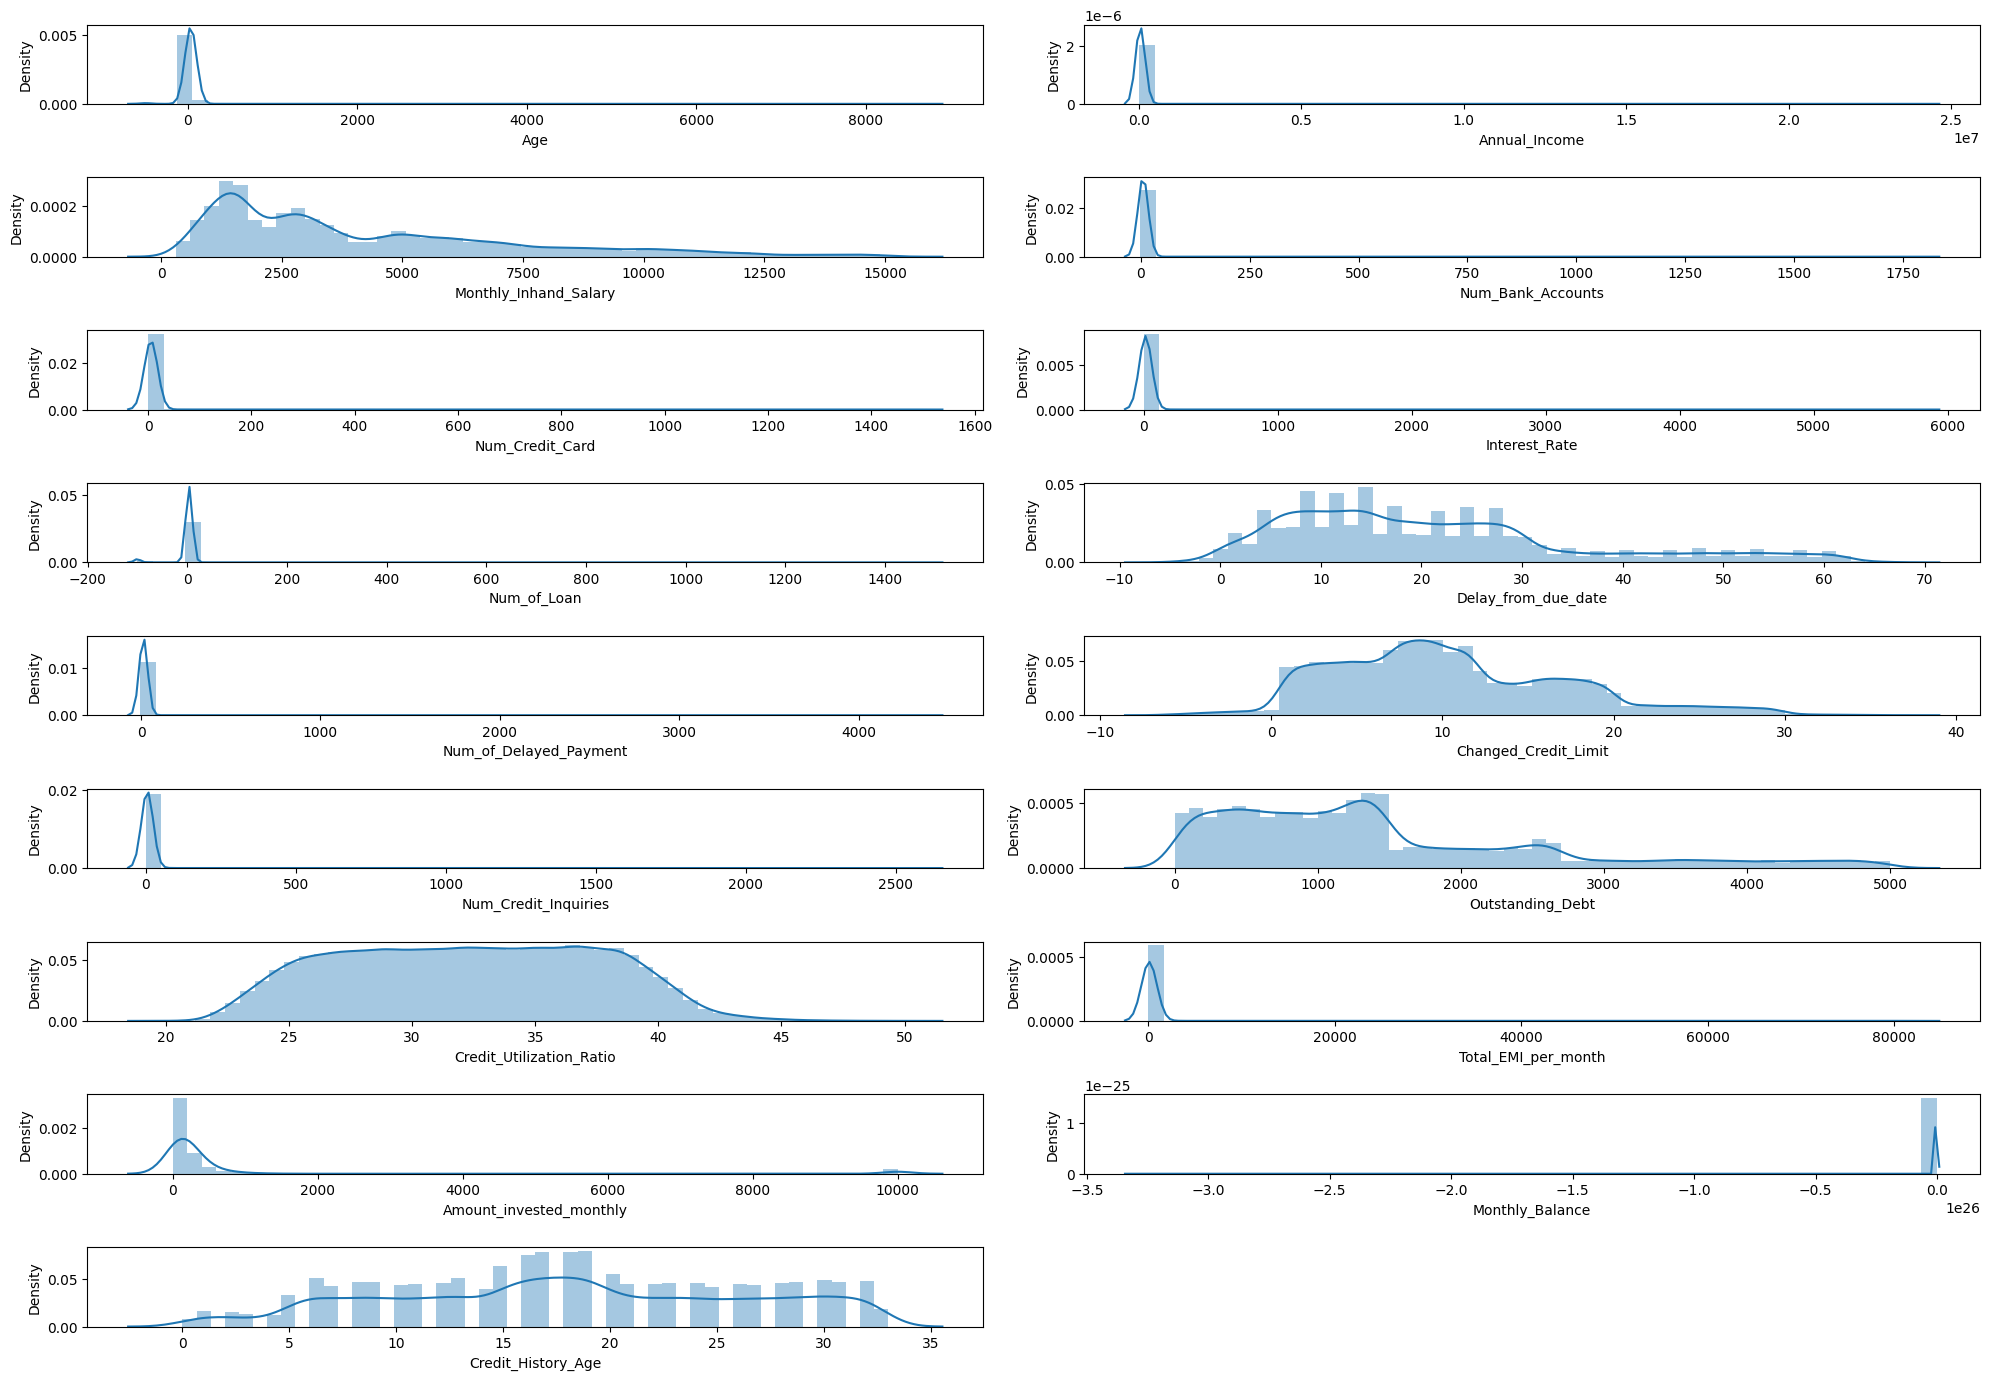

In [95]:
rows=10
cols=2
counter=1
plt.rcParams['figure.figsize']=[20, 15]
for i in num_cols:
    plt.subplot(rows, cols, counter)
    sns.distplot(df[i])
    counter+=1
plt.tight_layout()
plt.show()

**Credit_Utilization_Ratio** follows normal distribution

**Delay_from_due_data** is right skewed

**Changed_Credit_Limit** distribution looks fine, close to normal distribution

**Outstanding_Debt** is right skewed

**Monthly_Inhand_Salary** is right skewed

**Credit_History_age** is normally distributed


And all thre remaining fields contains outliers, because of that we are not able to properly distibute them with very less bins, lets try to remove outliers from those columns and replot them later.

### Distributions for the categorical columns

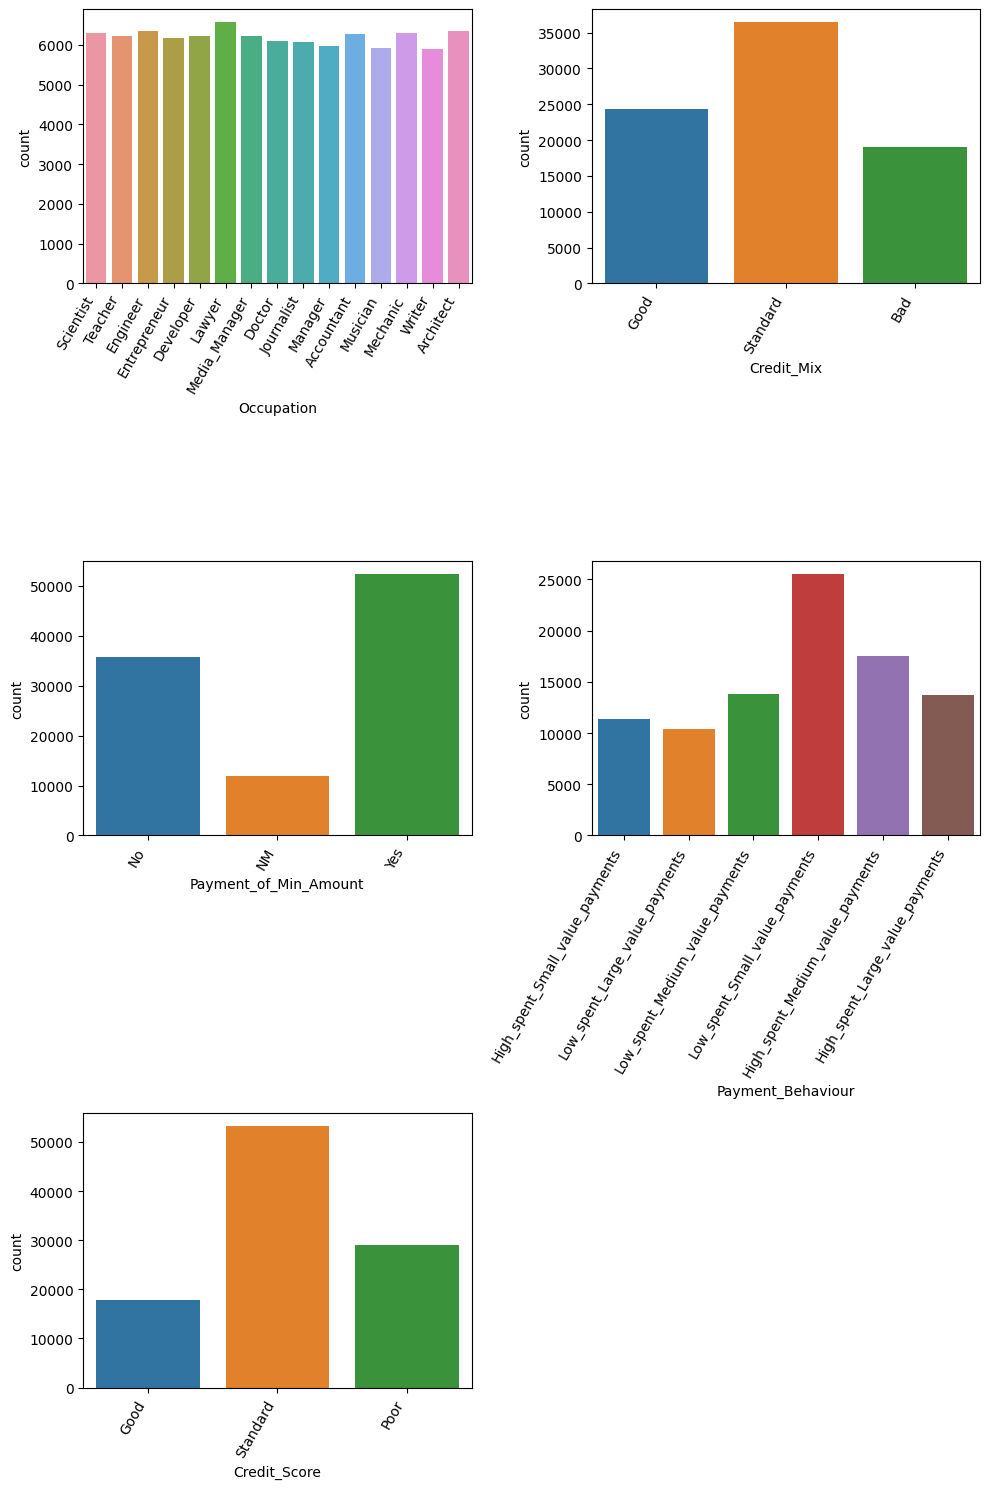

In [96]:
rows=3
cols=2
counter=1
plt.rcParams['figure.figsize']=[10,15]
for i in categorical_cols:
    plt.subplot(rows,cols,counter)
    sns.countplot(x=i,data=df)
    plt.xticks(rotation=60,ha='right')
    counter+=1
plt.tight_layout()
plt.show()

All the categorical columns have the equal distribution of data except **Payment_Behavious** and **Credit_Score**

**Occupation** column has mix of rows from the various job roles

**Credit_Mix** column data is spreaded across three categories

**Payment_of_Min_Amount** column has data from both Yes and No categories, but there is one more category 'NM' which might need to be tranformed into 'No' as it might have been entered as a typo or pre-processing error in the upstream.

**Payment_behaviour** coulmn has more data with the "Low_spent_small_values" category

**Credit_Score** which is our target has a mix of good, bad and standard credit classification values

In [97]:
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].replace({'NM': 'No'})

Plotting the **Payment_of_Min_Amount** after replacing it with proper value

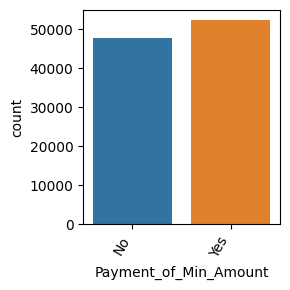

In [99]:
plt.rcParams['figure.figsize'] = [3,3]
sns.countplot(x='Payment_of_Min_Amount', data=df)
plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()

### 4.) Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)

Lets find out the correlation between all the variables. But before that, lets remove the outliers that are present in the dataset.

In [100]:
def remove_outlier(df):
    low = .05
    high = .95
    quant_df = df.quantile([low, high])
    print(quant_df)
    for name in list(df.columns):
        if is_numeric_dtype(df[name]):
            df = df[(df[name] > quant_df.loc[low, name]) & (df[name] < quant_df.loc[high, name])]
    return df

df = remove_outlier(df)

       Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0.05  16.0        9743.51             836.125833                1.0   
0.95  53.0      134533.32           10828.226500               10.0   

      Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from_due_date  \
0.05              3.0            2.0          0.0                  3.0   
0.95             10.0           33.0          8.0                 54.0   

      Num_of_Delayed_Payment  Changed_Credit_Limit  Num_Credit_Inquiries  \
0.05                     2.0                  1.16                   0.0   
0.95                    24.0                 23.60                  13.0   

      Outstanding_Debt  Credit_Utilization_Ratio  Total_EMI_per_month  \
0.05          118.5465                 24.230834             0.000000   
0.95         4073.7605                 40.220207           437.012753   

      Amount_invested_monthly  Monthly_Balance  
0.05                31.893067       174.599433  
0.95            

In [101]:
df.interpolate(method='linear', inplace=True)

### Encoding the categorical columns

In [102]:
Occupation_le = le()
Type_of_Loan_le = le()
Credit_Mix_le = le()
Credit_History_Age_le = le()
Payment_of_Min_Amount_le = le()
Payment_Behaviour_le = le()
Credit_Score_le = le()

df['Occupation'] = Occupation_le.fit_transform(df['Occupation'])
df['Type_of_Loan'] = Type_of_Loan_le.fit_transform(df['Type_of_Loan'])
df['Credit_Mix'] = Credit_Mix_le.fit_transform(df['Credit_Mix'])
df['Credit_History_Age'] = Credit_History_Age_le.fit_transform(df['Credit_History_Age'])
df['Payment_of_Min_Amount'] = Payment_of_Min_Amount_le.fit_transform(df['Payment_of_Min_Amount'])
df['Payment_Behaviour'] = Payment_Behaviour_le.fit_transform(df['Payment_Behaviour'])
df['Credit_Score'] = Credit_Score_le.fit_transform(df['Credit_Score'])

### Correlation Heatmap

<AxesSubplot: >

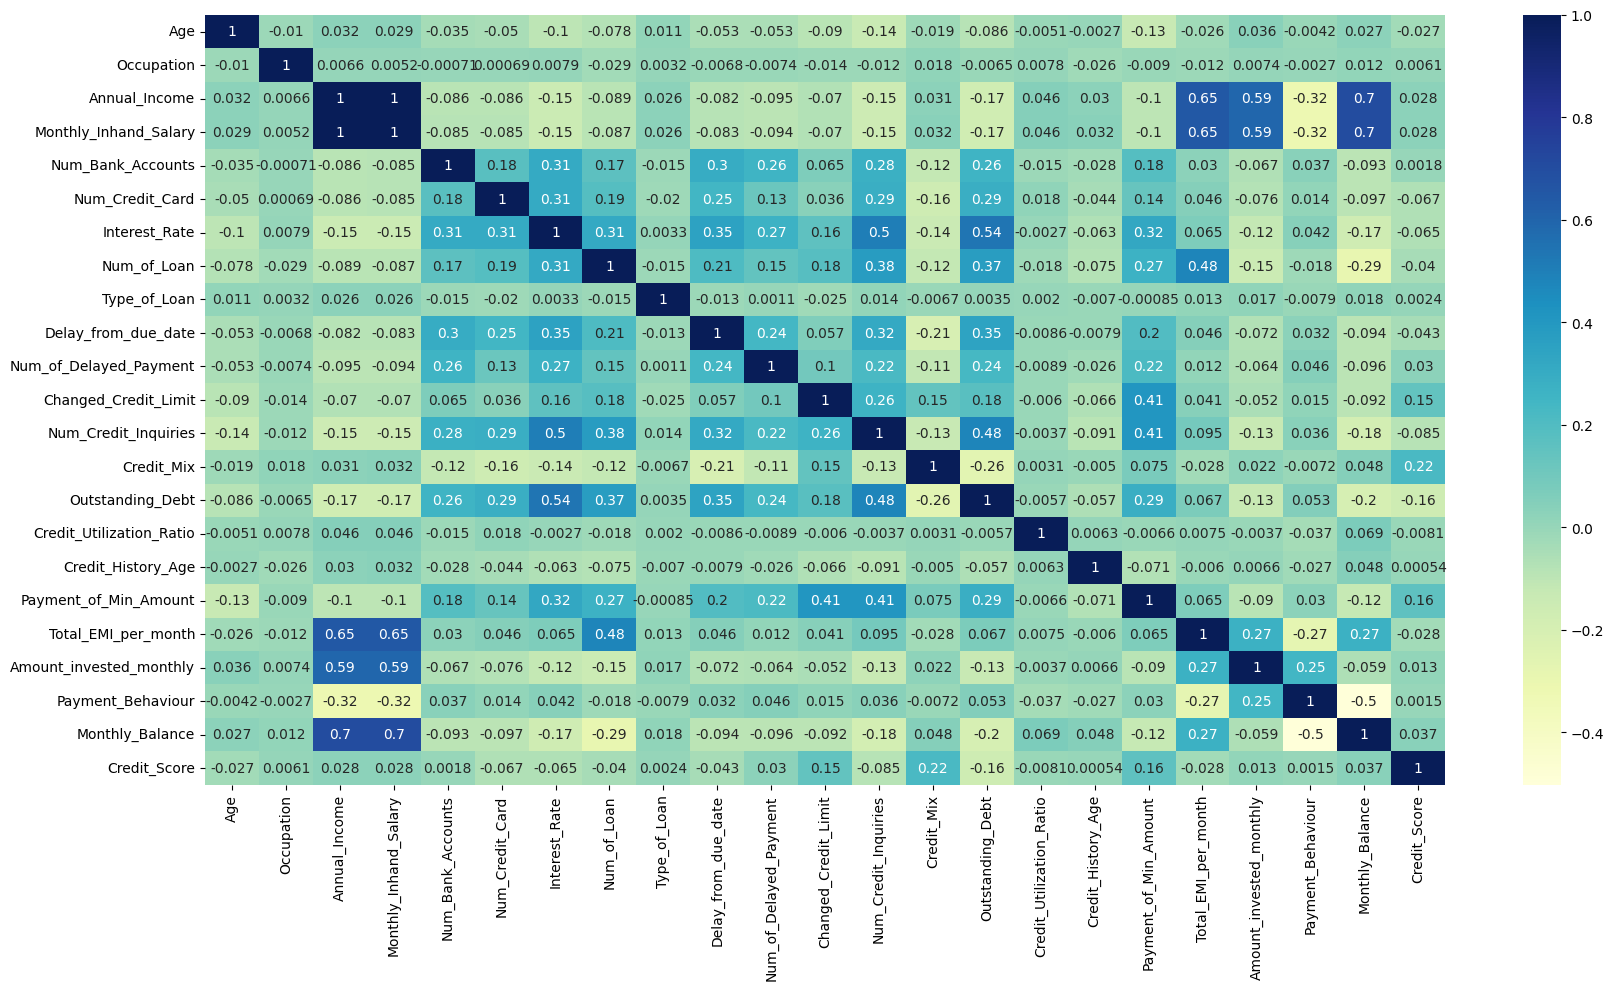

In [103]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr() , annot = True, cmap = "YlGnBu")

### Rank the columns based on the correlation

<AxesSubplot: >

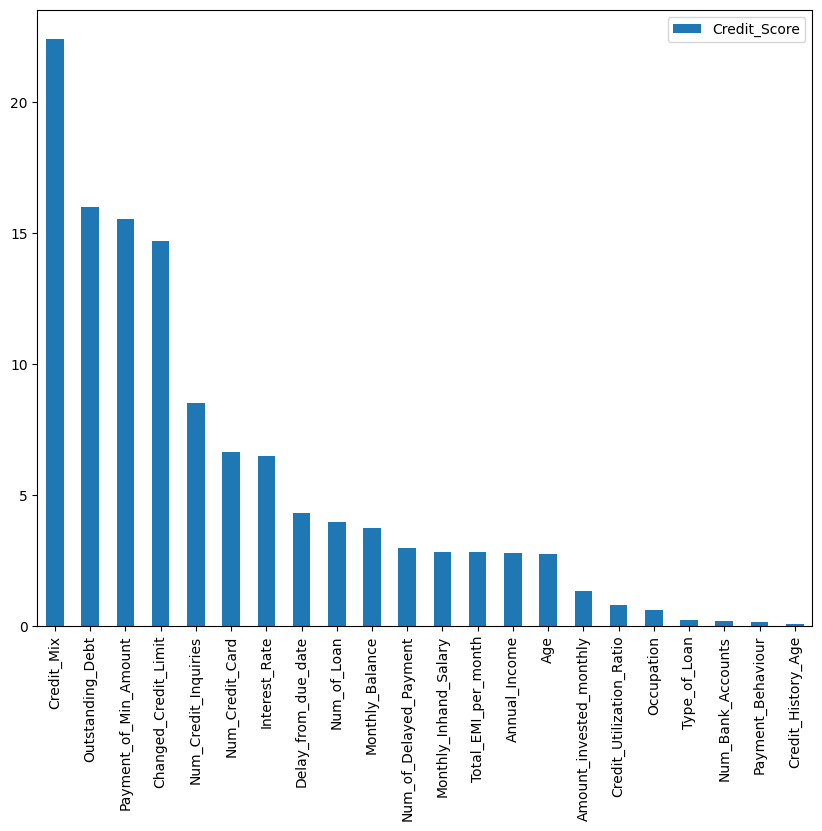

In [104]:
pd.DataFrame(abs(df.corr()['Credit_Score'].drop('Credit_Score')*100).sort_values(
    ascending=False)).plot.bar(figsize = (10,8))

Accoding to the heatmap and histogram, we can see that the following columns are correlated with the target variable "Credit score". Out of them **Outstanding_Debt** and **Credit_Mix** are highly correlated.

In [105]:
round(abs(df.corr()['Credit_Score']*100).sort_values(ascending=False), 2)

Credit_Score                100.00
Credit_Mix                   22.41
Outstanding_Debt             16.01
Payment_of_Min_Amount        15.55
Changed_Credit_Limit         14.70
Num_Credit_Inquiries          8.52
Num_Credit_Card               6.66
Interest_Rate                 6.48
Delay_from_due_date           4.30
Num_of_Loan                   3.98
Monthly_Balance               3.74
Num_of_Delayed_Payment        2.97
Monthly_Inhand_Salary         2.84
Total_EMI_per_month           2.80
Annual_Income                 2.77
Age                           2.75
Amount_invested_monthly       1.34
Credit_Utilization_Ratio      0.81
Occupation                    0.61
Type_of_Loan                  0.24
Num_Bank_Accounts             0.18
Payment_Behaviour             0.15
Credit_History_Age            0.05
Name: Credit_Score, dtype: float64

### Variance Inflation Factor(VIF)

In [106]:
numeric_cols = df.select_dtypes(exclude = "object").columns

vif_df = df[numeric_cols]
vif_data = pd.DataFrame()
vif_data["feature"] = vif_df.columns
vif_data["VIF"] = [variance_inflation_factor(vif_df.values ,i) for i in range(len(vif_df.columns))]
vif_data.head(17)

,feature,VIF
0,Age,13.054516
1,Occupation,3.639357
2,Annual_Income,692.661411
3,Monthly_Inhand_Salary,809.153941
4,Num_Bank_Accounts,12.314756
5,Num_Credit_Card,21.596890
6,Interest_Rate,8.780960
7,Num_of_Loan,11.686384
8,Type_of_Loan,3.951536
9,Delay_from_due_date,6.156857


From the above table, we can see that the **Annual_Income**, **Monthly_Inhand_Salary**, **Credit_Utilization_Ratio**, **Num_of_Delayed_Payment** and **Num_of_Loan** are highly correlated.

We are going to remove the **Monthly_Inhand_Salary** and **Num_of_Delayed_Payment** from the list of independent columns because we can infer the same information from the **Annual_Income** and **Credit_Utilization_Ratio** respectively.

### 5.) Which independent variables have missing data? How much? 

In [107]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})

missing_value_df.sort_values('percent_missing', ascending=False, inplace=True)
missing_value_df

,column_name,percent_missing
Age,Age,0.0
Num_Credit_Inquiries,Num_Credit_Inquiries,0.0
Monthly_Balance,Monthly_Balance,0.0
Payment_Behaviour,Payment_Behaviour,0.0
Amount_invested_monthly,Amount_invested_monthly,0.0
Total_EMI_per_month,Total_EMI_per_month,0.0
Payment_of_Min_Amount,Payment_of_Min_Amount,0.0
Credit_History_Age,Credit_History_Age,0.0
Credit_Utilization_Ratio,Credit_Utilization_Ratio,0.0
Outstanding_Debt,Outstanding_Debt,0.0


There are no columns with the missing values as we have already taken care with the help of linear interpolation technique in the above steps.

### 6.) Do the training and test sets have the same data?

No, train and test splits will not have a same data. We are using a funtion **train_test_split** provided by the **sklearn** module. It will take care of train and test to have a completely different data with each other.



### 7.) In the predictor variables independent of all the other predictor variables?

In [108]:
numeric_cols = df.select_dtypes(exclude = "object").columns

vif_df = df[numeric_cols]
vif_data = pd.DataFrame()
vif_data["feature"] = vif_df.columns
vif_data["VIF"] = [variance_inflation_factor(vif_df.values ,i) for i in range(len(vif_df.columns))]
vif_data.head(17)

,feature,VIF
0,Age,13.054516
1,Occupation,3.639357
2,Annual_Income,692.661411
3,Monthly_Inhand_Salary,809.153941
4,Num_Bank_Accounts,12.314756
5,Num_Credit_Card,21.596890
6,Interest_Rate,8.780960
7,Num_of_Loan,11.686384
8,Type_of_Loan,3.951536
9,Delay_from_due_date,6.156857


From the above table, we can see that the **Annual_Income**, **Monthly_Inhand_Salary**, **Credit_Utilization_Ratio**, **Num_of_Delayed_Payment** and **Num_of_Loan** are highly correlated. We are going to remove 4 out of them from the independent variables list.

### 8.) Which predictor variables are the most important?

The following columns are having the high correlation value.

Credit_Mix                   22.41

Outstanding_Debt             16.01

Payment_of_Min_Amount        15.55

Changed_Credit_Limit         14.70

Num_Credit_Inquiries          8.52

The above four columns are the important one because they are highly correlated with the target variable.

### 9.) Do the ranges of the predictor variables make sense?

Ranges are not as per the expectations, so we have removed the outliers with the help of *remove_outliers* funtion.

### 10.) What are the distributions of the predictor variables? 

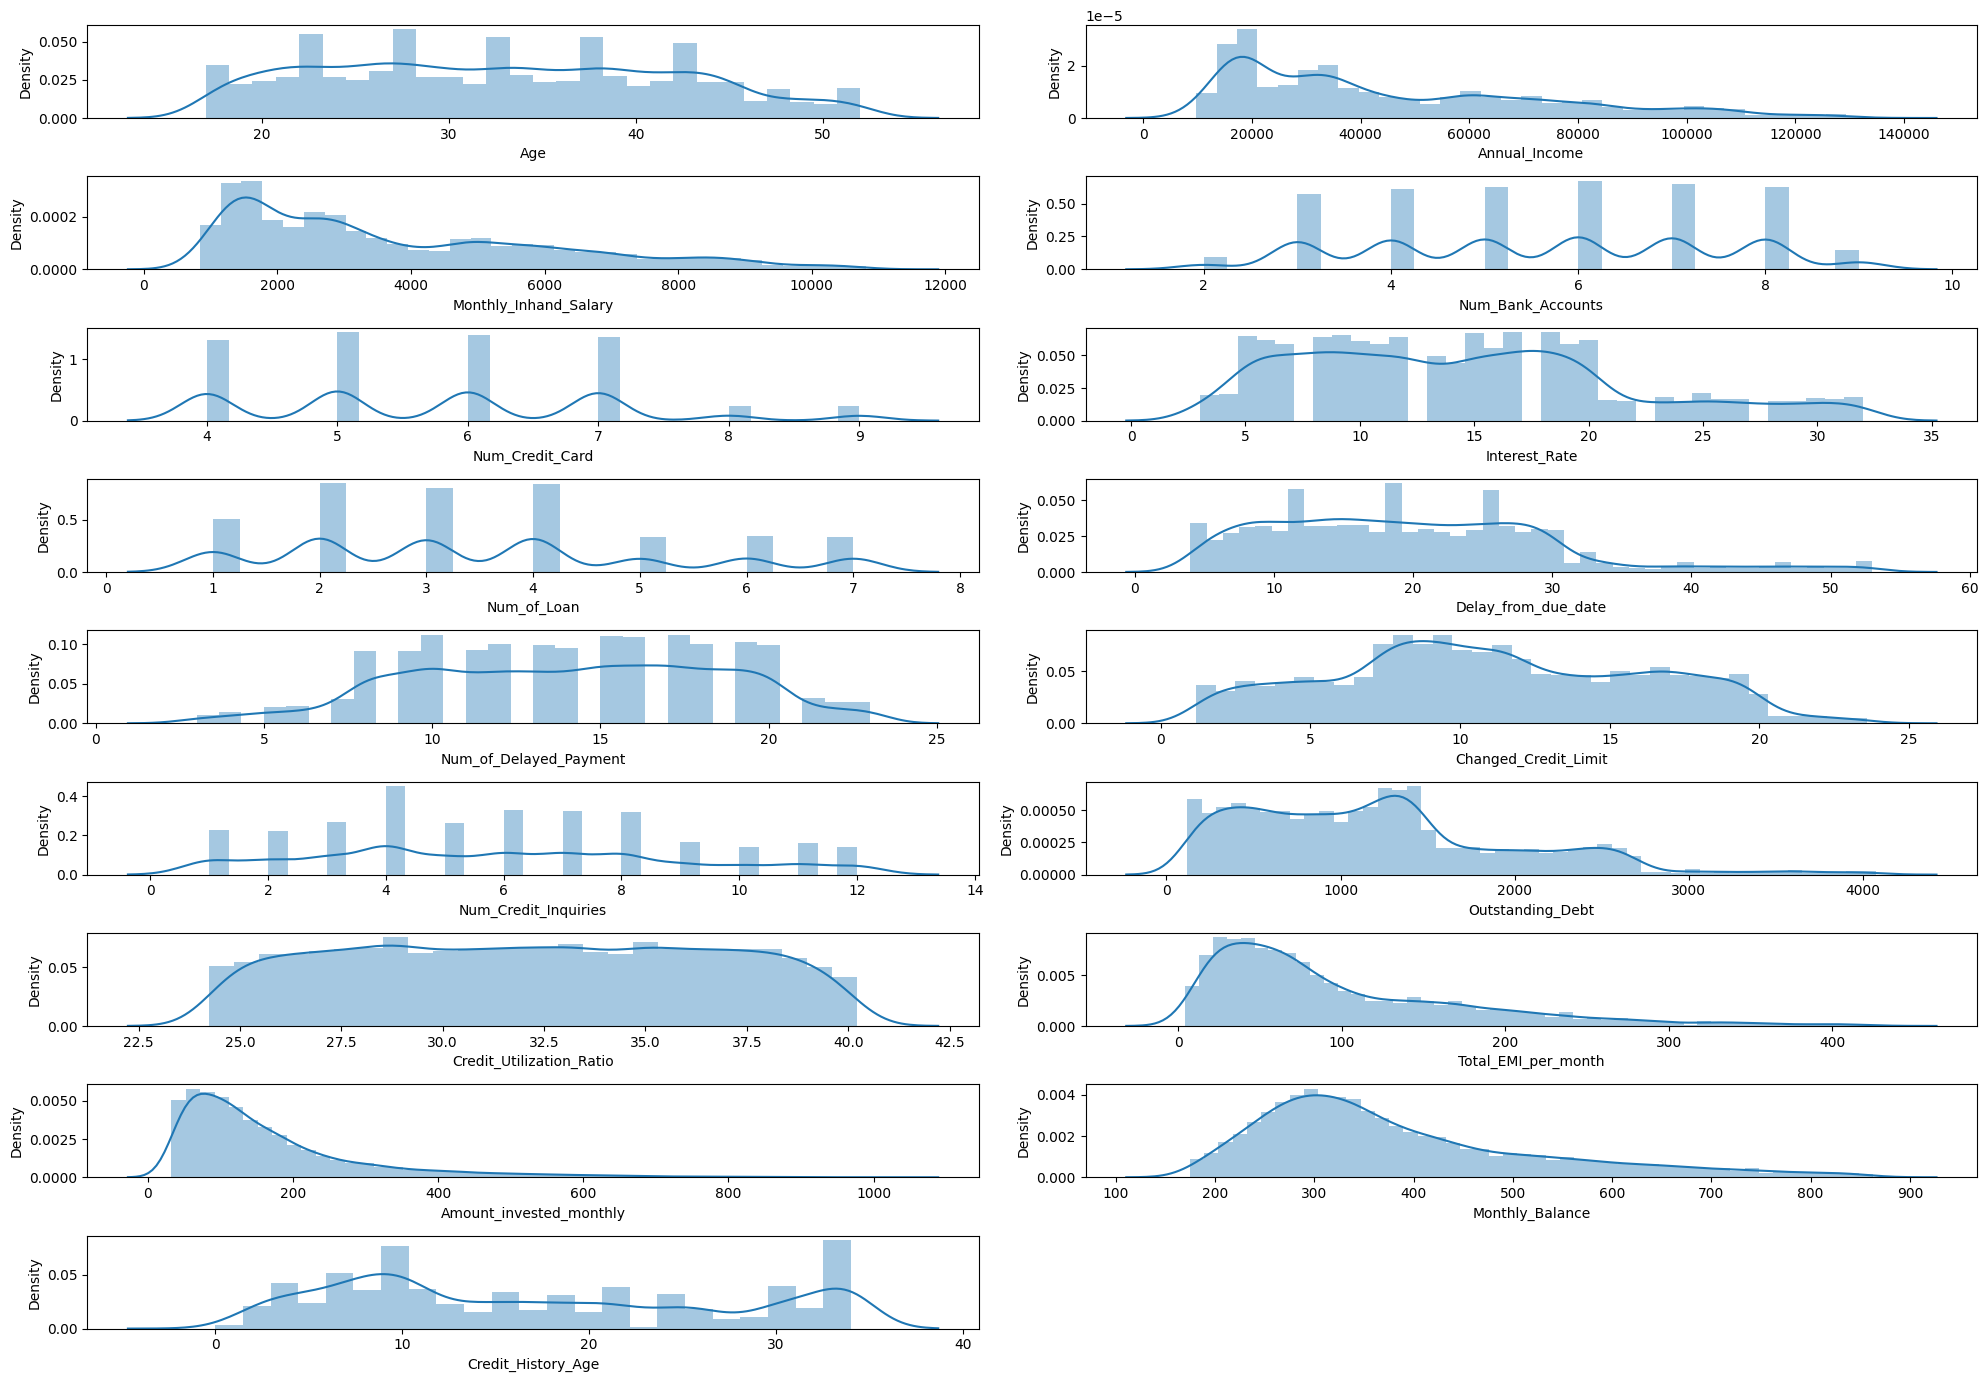

In [109]:
rows=10
cols=2
counter=1
plt.rcParams['figure.figsize']=[20, 15]
for i in num_cols:
    plt.subplot(rows, cols, counter)
    sns.distplot(df[i])
    counter+=1
plt.tight_layout()
plt.show()

After removing the outliers, the distributions are changed.

Most of the columns are distributed across all the ranges, but still we can observe some of them are right skewed.

### 11.) Remove outliers and keep outliers (does if have an effect of the final predictive model)?

In [110]:
mdf = df[
    ['Credit_Score','Changed_Credit_Limit',
      'Payment_of_Min_Amount', 'Credit_Mix',
      'Delay_from_due_date', 'Annual_Income',
      'Age', 'Monthly_Balance', 'Outstanding_Debt',
      'Payment_Behaviour', 'Credit_History_Age',
      'Num_Bank_Accounts'
    ]
]

In [111]:
x = mdf.drop(['Credit_Score'] , axis = 1).values
y = mdf['Credit_Score' ].values

### Remove Outliers and calculate Train Test Scores

[(10455, 11), (10455,), (2614, 11), (2614,)]
Train Score: 0.6983261597321856
Test Score: 0.6866870696250956


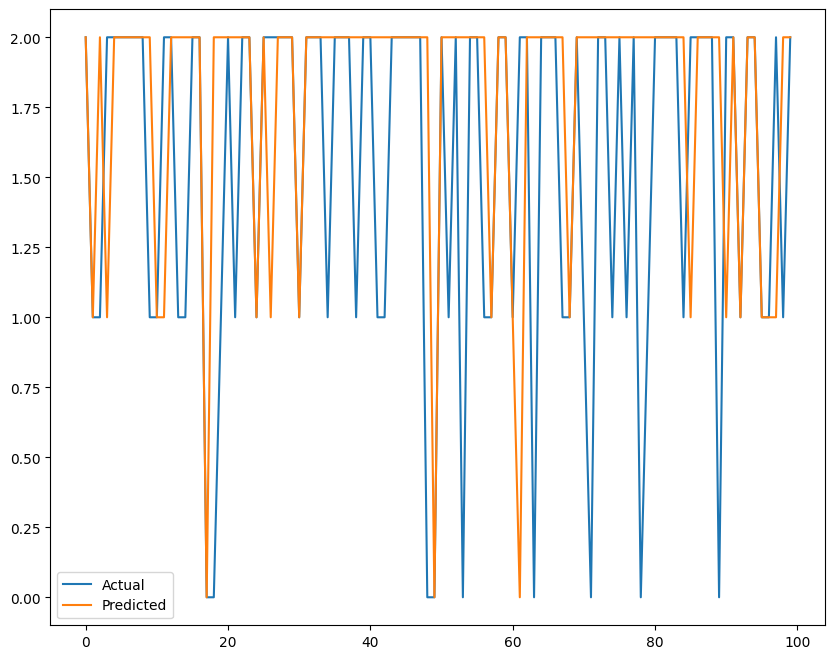

In [112]:
# Data Split
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size= 0.2 , random_state=50)
print([x_train.shape, y_train.shape, x_test.shape, y_test.shape])

# Data Scaling using Robust Scaler
ro_scaler = rbScaler()
x_train = ro_scaler.fit_transform(x_train)
x_test = ro_scaler.fit_transform(x_test)
[x_train.shape, x_test.shape]

# logistic Regression
lgr = lgrClassifier(C = 100)
lgr.fit(x_train , y_train)

lgr_score = lgr.score(x_train , y_train)
lgr_score_t = lgr.score(x_test , y_test)

y_pred1 = lgr.predict(x_test)
dd = pd.DataFrame({"Y_test" : y_test , "y_pred1": y_pred1})
plt.figure(figsize=(10,8))
plt.plot(dd[:100])
plt.legend(["Actual" , "Predicted"])

print(f"Train Score: {lgr_score}")
print(f"Test Score: {lgr_score_t}")

### Train and test Scores with outliers

Wrote a script to pass the "include outliers" parameter. This script will be available in the github under the URL https://github.com/aiskunks/Skunks_Skool/tree/main/INFO_6105/ML_Data_Cleaning_and_Feature_Selection

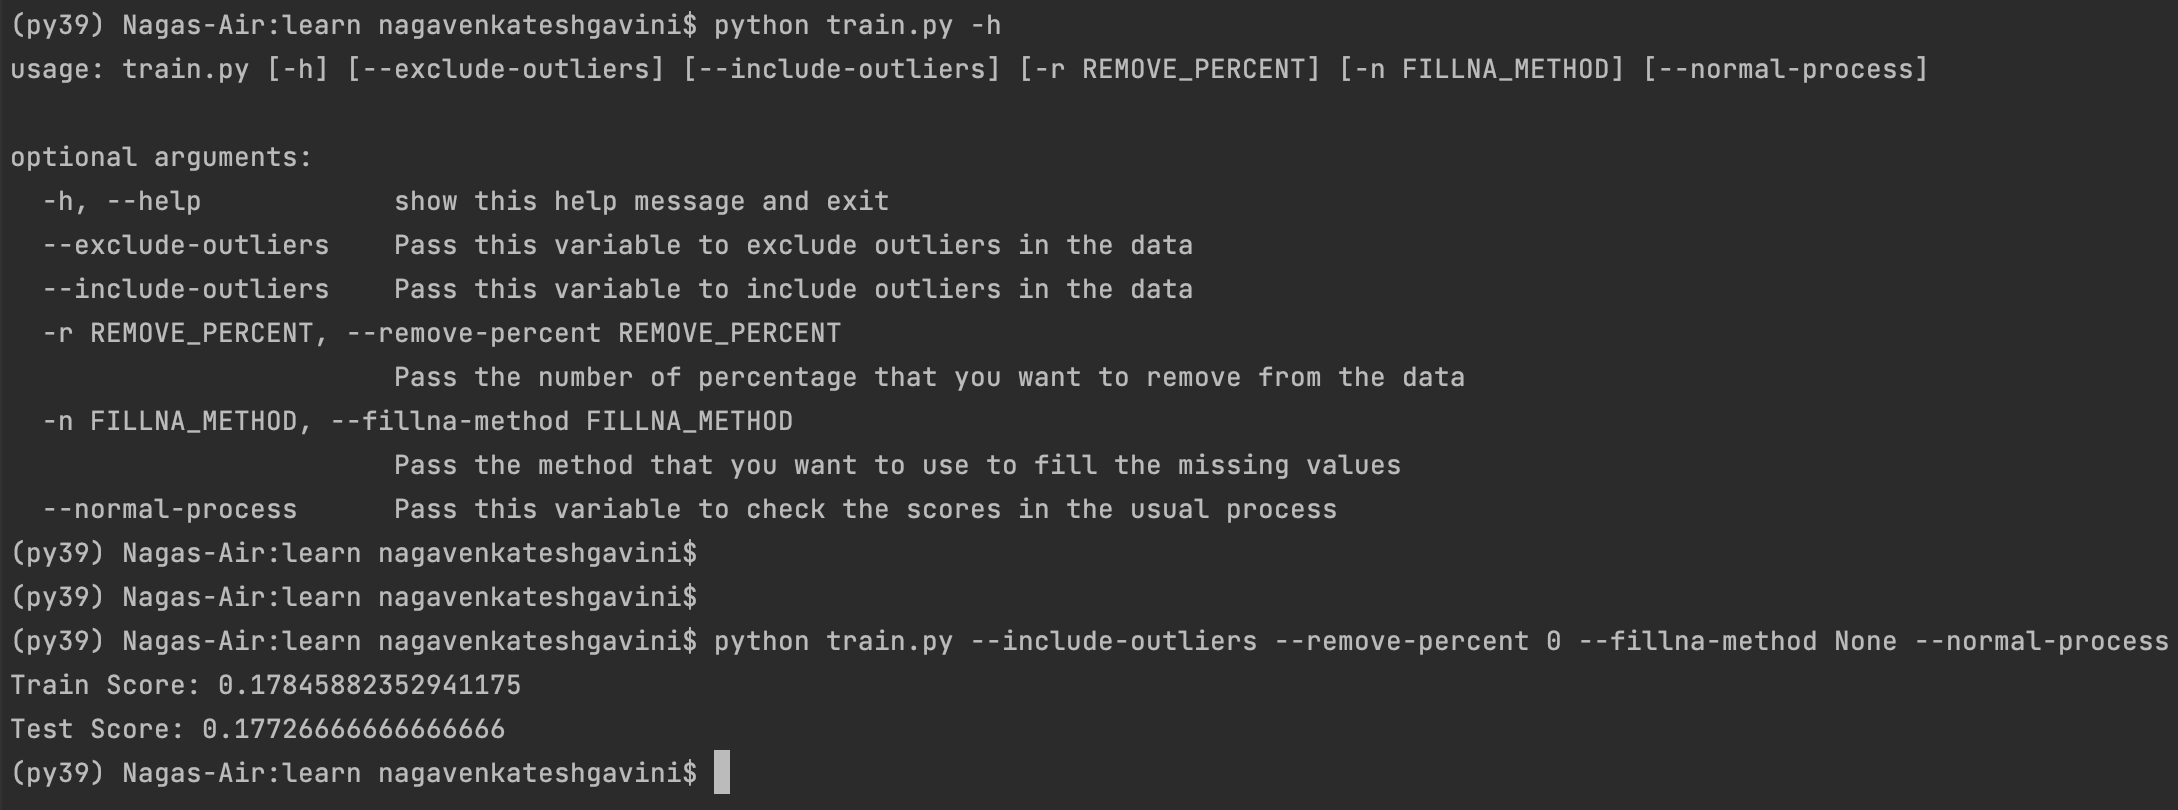

As we can see in the above screenshot, the train and test scores were really bad in case of outliers.

Final Table with the scores

|Train Score|Test Score|Outliers in data?|
|---|---|---|
|0.698|0.686|No|
|0.178|0.177|Yes|

### 12.) Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.

### 1 percent data removed and imputed with bfill approach

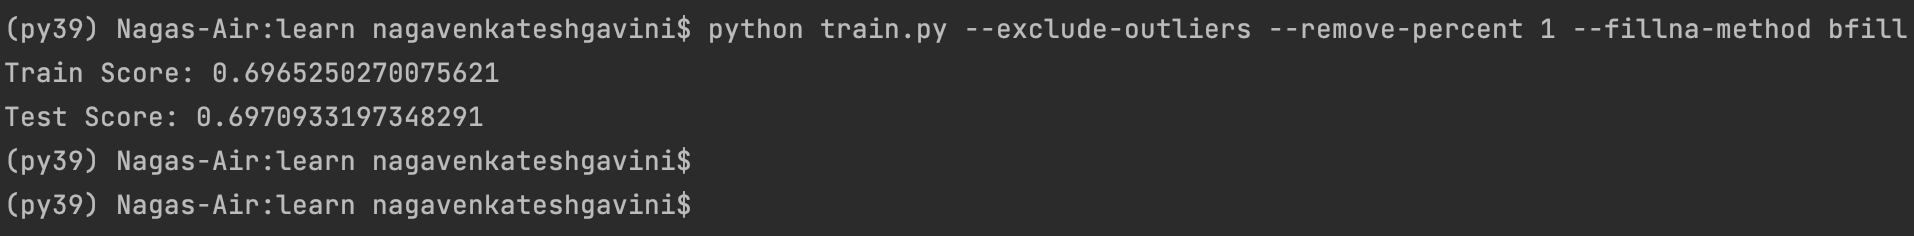

### 5 percent removed and imputed with bfill approach 

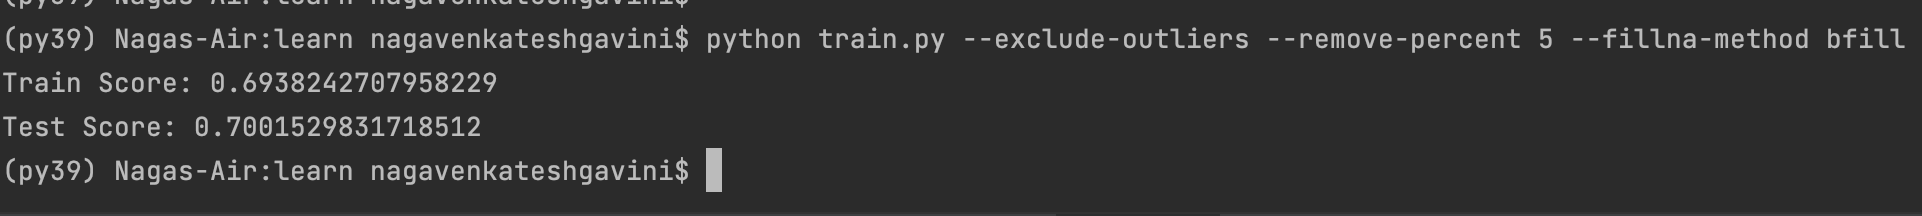

### 10 percent removed and imputed with bfill approach

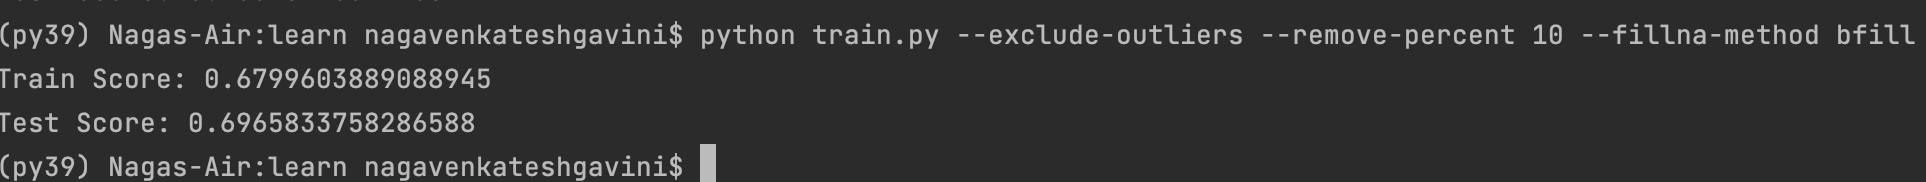

### 1 percent removed and imputed with mode

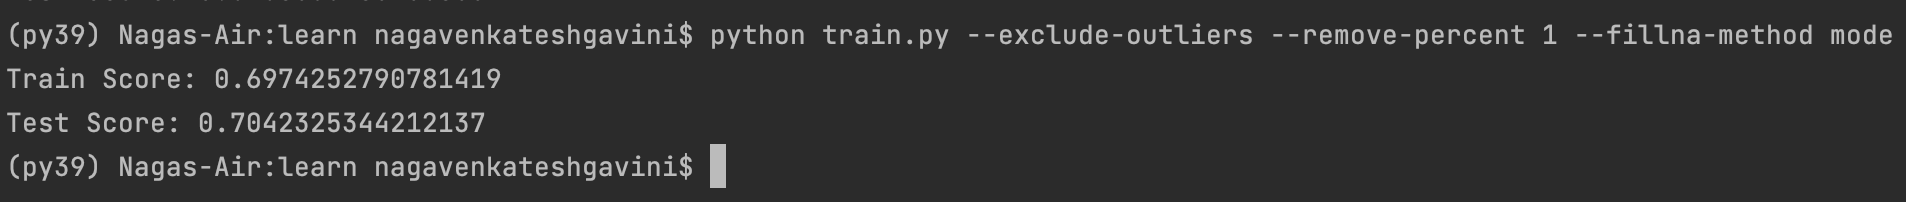

### 5 percent removed and imputed with mode

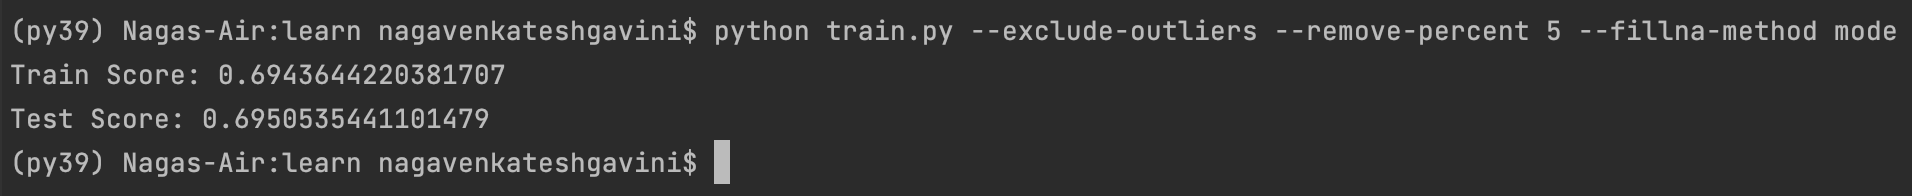

### 10 percent removed and imputed with mode

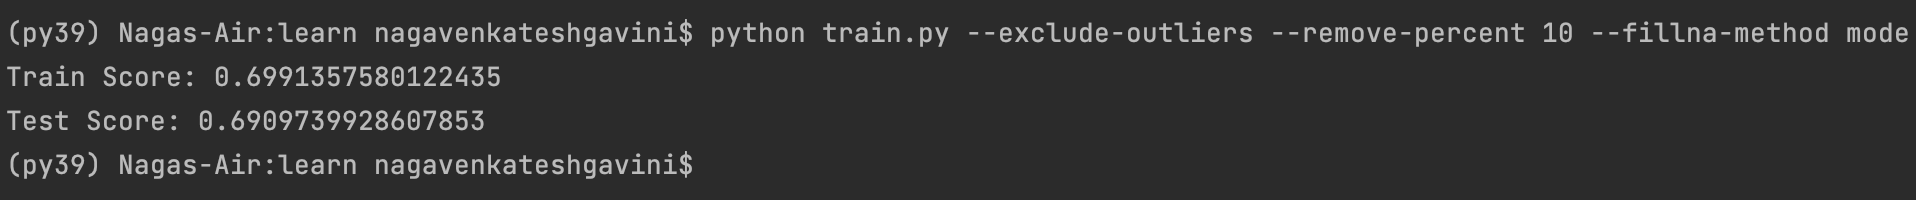

### 1 percent removed and imputed with ffill

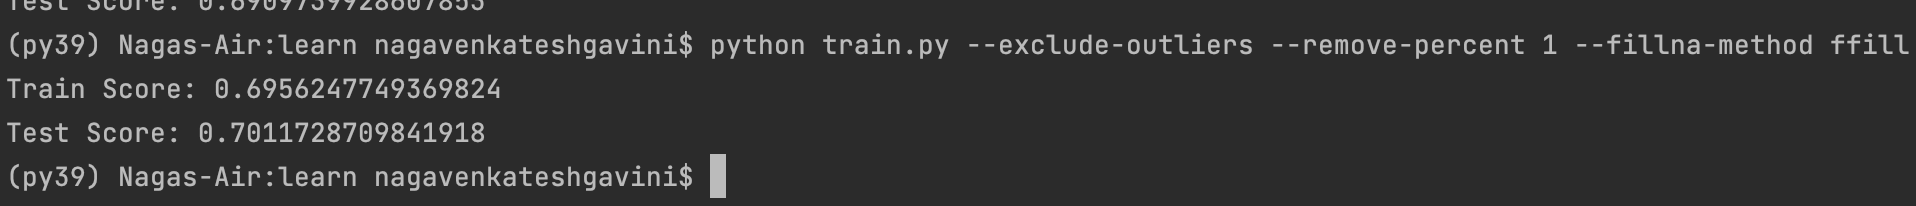

### 5 percent removed and imputed with ffill

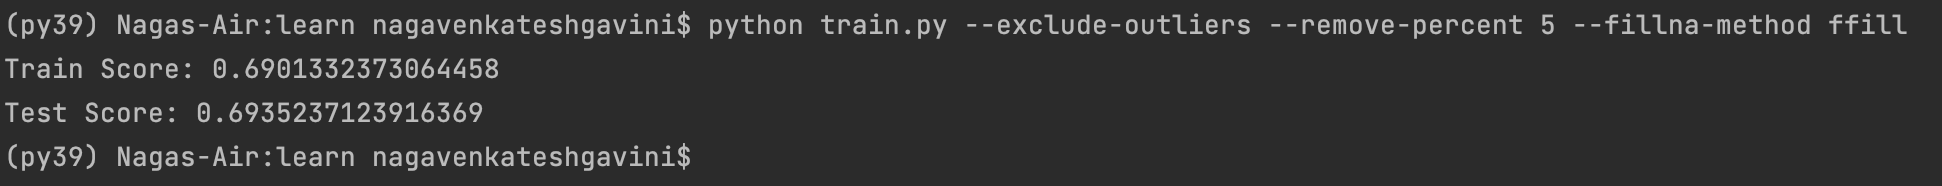

### 10 percent removed and imputed with ffill

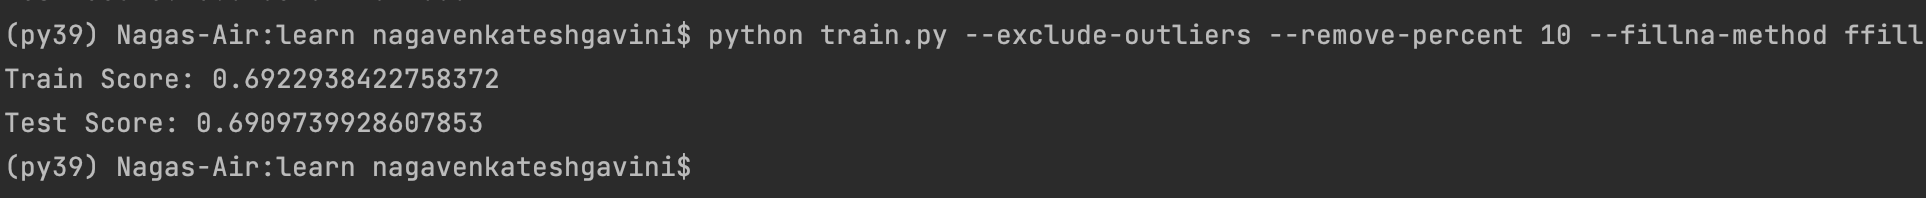

Remove and imputation technique doesn't help much with the current data set that we have.

### 13.) For categorical data, calculate the accuracy and a confusion matrix.

### Final Train and Test Score

In [82]:
print(f"Train Score: {lgr_score}")
print(f"Test Score: {lgr_score_t}")

Train Score: 0.6983261597321856
Test Score: 0.6866870696250956


### Confusion Matrix

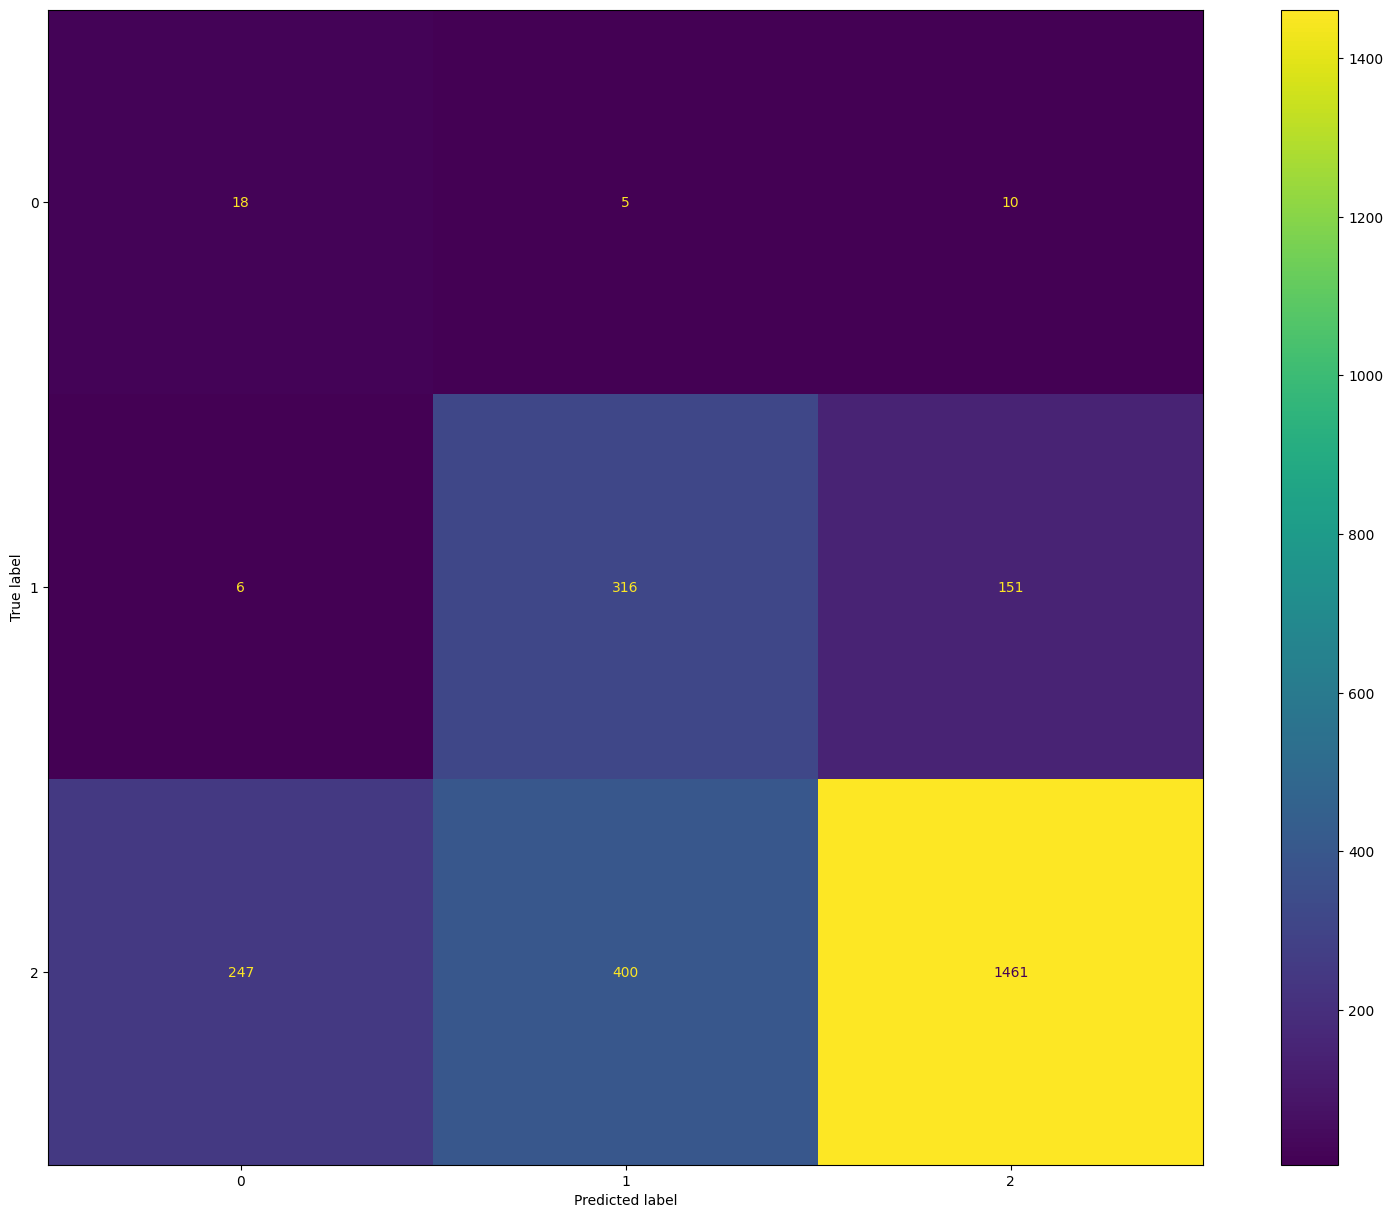

In [83]:
y_pred = lgr.predict(x_test)
cm = metrics.confusion_matrix(y_pred, y_test)
cmd = metrics.ConfusionMatrixDisplay(cm)
cmd.plot()

From the confusion matrix we can observe that there are still so many errors for the class **Poor**

## Conclusion

After data analysis, cleaning and training, we were able to get the test score of **68.66** with the help of logistic regression algorithm.

We can improve the score by integrating better imputation techniques and different classification algorithms later.

## References

Refered the following links to understand the functions or the processes that are going to be required during the problem analysis.
    
    1. Scikit-learn Documentation
        
    2. Pandas Official Documentation
    
    3. Analytics Vidya
    
    4. medium: towardsdatascience
    
    5. Seaborn: statistical data visualization
    
All the visualization code was referred form the **seaborn** and **scikit-learn** official documentations. **Data frame** functions and usage was referred from the **Pandas** official documentation. All the concepts and doubts in the machine learning cleared with the help of **medium(towardsdatascience)** and **analytics vidya** articles. Rest of the code is written individually.

Copyright 2022 Naga Venkatesh Gavini

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.